In [1]:
import torch
import h5py
import os
import numpy as np
from torch import nn as nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

from d2l import torch as d2l

In [2]:
# get the file name of path
def get_fname(path):
    files = os.listdir(path)
    files.sort()
    return files

In [3]:
data_dir = "../../dataset/train"

In [4]:
files = get_fname(data_dir)
files.sort()

In [5]:
len(files), files[0]

(6000, 'particleID1.hdf5')

In [6]:
def get_fpath(path, fname):
    return os.path.join(path, fname)

def get_hdf5_group(hdf5File):
    group = []
    for key in hdf5File:
        group.append(key)
    return group

In [7]:
f1 = h5py.File(get_fpath(data_dir, files[0]))
f2 = h5py.File(get_fpath(data_dir, files[1]))

In [8]:
data1 = f1[get_hdf5_group(f1)[0]]
data2 = f2[get_hdf5_group(f2)[0]]

In [9]:
print(data1[0],data2[0])

[ 1.0000000e+00  2.9456370e+21  7.9943233e+00  1.4509925e+07
 -1.9568456e+11  2.4651726e+07 -1.6436408e+08 -4.3989524e+07
 -1.0778338e+07  2.7425510e+02  4.4113613e+04  1.7417133e+02] [ 1.0000000e+01  2.9456370e+21  8.0024481e+00  1.4107614e+07
 -1.9564783e+11  2.4640620e+07 -1.6455928e+08 -4.3253580e+07
  1.2894613e+07  2.9160733e+02  4.4095953e+04  1.3067218e+02]


In [10]:
import matplotlib.pyplot as plt

In [11]:
def plot_(x, y, xlabel, ylabel):
    plt.scatter(x, y)
    #plt.plot(x, y, color)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [12]:
x1 = data1[:,6]
x10 = data2[:,6]

In [13]:
xv1 = data1[:,9]
xv2 = data2[:,9]

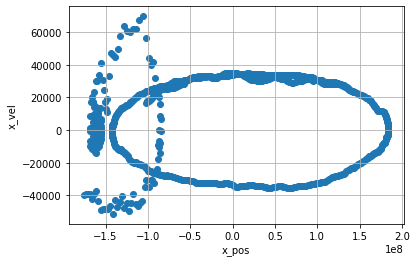

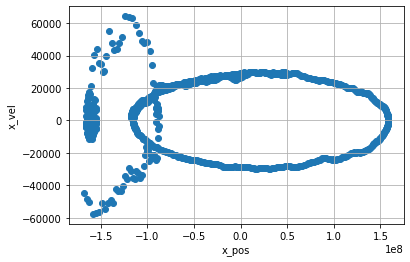

In [14]:
plot_(x1, xv1, 'x_pos', 'x_vel')
plot_(x10, xv2, 'x_pos', 'x_vel')

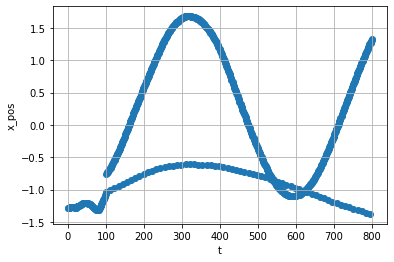

In [50]:
plot_(np.linspace(0, 800, 799), data_norm(x1, 0.000001), 't', 'x_pos')

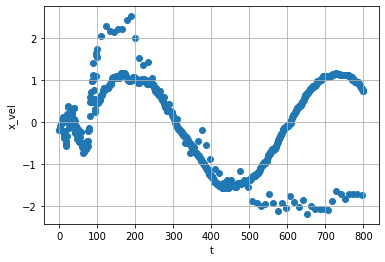

In [51]:
plot_(np.linspace(0, 800, 799), data_norm(xv1, 0.000001), 't', 'x_vel')

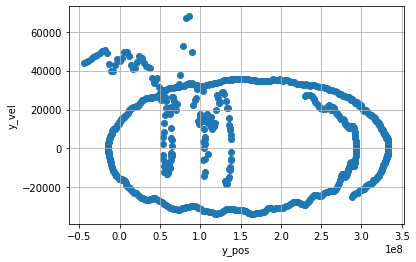

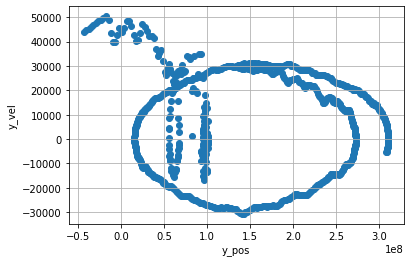

In [15]:
y1 = data1[:,7]
yv1 = data1[:,10]
plot_(y1, yv1, 'y_pos', 'y_vel')
y10 = data2[:,7]
yv2 = data2[:,10]
plot_(y10, yv2, 'y_pos', 'y_vel')

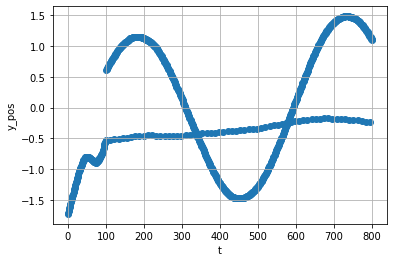

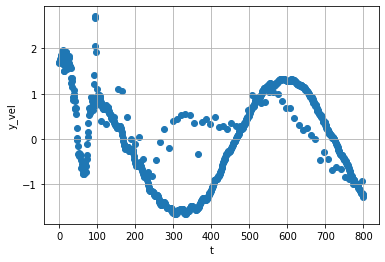

In [53]:
plot_(np.linspace(0, 800, 799), data_norm(y1, 0.000001), 't', 'y_pos')
plot_(np.linspace(0, 800, 799), data_norm(yv1, 0.000001), 't', 'y_vel')

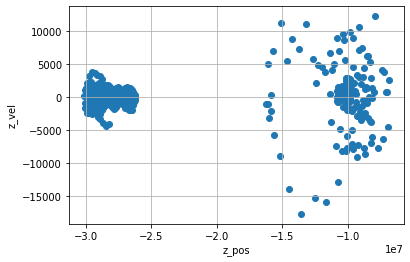

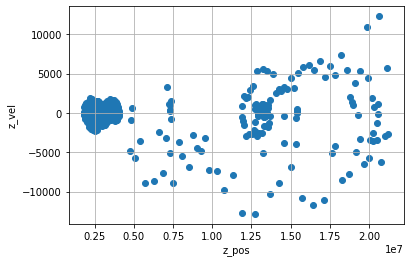

In [16]:
z1 = data1[:,8]
zv1 = data1[:,11]
plot_(z1, zv1, 'z_pos', 'z_vel')

z10 = data2[:,8]
zv2 = data2[:,11]
plot_(z10, zv2, 'z_pos', 'z_vel')

In [17]:
# physcial quantity squence is ids mass rho ie pot sl pos*3 vel*3
def chose_input_output_phy_qua(data, phy_qua):
    assert phy_qua == "mass" or phy_qua == "rho" or phy_qua == "ie" or phy_qua == "pot" or phy_qua == "sl" or phy_qua == "pos" or phy_qua == "vel"
    if phy_qua == "mass":
        return data[:, 1]
    if phy_qua == "rho":
        return data[:, 2]
    if phy_qua == "ie":
        return data[:, 3]
    if phy_qua == "pot":
        return data[:, 4]
    if phy_qua == "rho":
        return data[:, 5]
    if phy_qua == "pos":
        return data[:, -6:-3]
    if phy_qua == "vel":
        return data[:, -3:]

In [18]:
# norm function for numpy
def data_norm(data, delta):
    mean = data.mean(axis=0, keepdims=True)
    std = data.std(axis=0, keepdims=True)
    return (data-mean)/(std+delta)

In [19]:
len(data1), len(data2)

(799, 799)

In [20]:
data1_norm_pos_x = data_norm(data1[:,6], 0.00001)

In [21]:
data1_norm_pos_x.min(), data1_norm_pos_x.max(), data1_norm_pos_x.shape

(-1.3763672, 1.6798646, (799,))

In [22]:
data1_norm_vel_x = data_norm(data1[:,9], 0.00001)

In [23]:
data1_norm_vel_x.min(), data1_norm_vel_x.max(), data1_norm_vel_x.shape

(-2.181037, 2.5159612, (799,))

In [24]:
# Initial state
#每个粒子的第一个数据作为初始状态

In [25]:
#train set

#verification set

#test set

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [27]:
import os
import time
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# from torchdiffeq.torchdiffeq import odeint

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from torchdiffeq import odeint

In [29]:
batch_time = 10
batch_size = 20
data_size = 200

viz = True

In [30]:
true_pos_vel_0 = torch.tensor([data1_norm_vel_x[0], data1_norm_vel_x[0]]).to(device)
#true_vel0 = torch.tensor(data1[0][9:12]).to(device)
t = torch.linspace(-5., 5., data_size).to(device)
true_y = torch.tensor([data1_norm_pos_x[1:], data1_norm_vel_x[1:]]).to(device)

/tmp/ipykernel_87438/3076254465.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  true_y = torch.tensor([data1_norm_pos_x[1:], data1_norm_vel_x[1:]]).to(device)


In [39]:
true_y[0]

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [32]:
class ODEFunc(nn.Module):

    def __init__(self):
        super(ODEFunc, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(2, 150),
            nn.Tanh(),
            nn.Linear(150, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 2),
        )

        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=0.1)
                nn.init.constant_(m.bias, val=0)

    def forward(self, t, y):
        return self.net(y)

In [33]:
def get_batch(data_size, batch_time, batch_size, true_y, t):
    s = torch.from_numpy(np.random.choice(np.arange(data_size - batch_time, dtype=np.int64), batch_size, replace=False))
    batch_y0 = true_y[s]  # (M, D)
    batch_t = t[:batch_time]  # (T)
    batch_y = torch.stack([true_y[s + i] for i in range(batch_time)], dim=0)  # (T, M, D)
    return batch_y0.to(device), batch_t.to(device), batch_y.to(device)


def makedirs(dirname):
    if not os.path.exists(dirname):
        os.makedirs(dirname)

In [34]:
DATA_TYPE = 'SPH_Neural ODE result'

In [35]:
if viz:
    makedirs(DATA_TYPE)
    import matplotlib.pyplot as plt

def visualize(true_y, pred_y, odefunc, itr):
  
    if viz:
      
        plt.figure(figsifacecolor='white')
        plt.xlabel('t')
        plt.ylabel('x, y')
        plt.grid()
        plt.plot(t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 0], t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 1], 'g-')
        plt.plot(t.cpu().numpy(), pred_y.cpu().numpy()[:, 0, 0], '--', t.cpu().numpy(), pred_y.cpu().numpy()[:, 0, 1], 'b--')
        plt.savefig(DATA_TYPE + '/ts' + str(itr) + '.png')
        plt.show()
        
        plt.figure(facecolor='white')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.plot(true_y.cpu().numpy()[:, 0, 0], true_y.cpu().numpy()[:, 0, 1], 'g-')
        plt.plot(pred_y.cpu().numpy()[:, 0, 0], pred_y.cpu().numpy()[:, 0, 1], 'b--')
        plt.savefig(DATA_TYPE + '/phase' + str(itr) + '.png')
        plt.show()

In [36]:
class RunningAverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self, momentum=0.99):
        self.momentum = momentum
        self.reset()

    def reset(self):
        self.val = None
        self.avg = 0

    def update(self, val):
        if self.val is None:
            self.avg = val
        else:
            self.avg = self.avg * self.momentum + val * (1 - self.momentum)
        self.val = val

In [37]:
ii = 0
niters = 5000

func = ODEFunc().to(device)
optimizer = optim.RMSprop(func.parameters(), lr=1e-3)
end = time.time()

time_meter = RunningAverageMeter(0.97)
loss_meter = RunningAverageMeter(0.97)

for itr in range(1, niters + 1):
    optimizer.zero_grad()
    batch_y0, batch_t, batch_y = get_batch(data_size, batch_time, batch_size, true_pos_vel_0, t)
    pred_y = odeint(func, batch_y0, batch_t).to(device)
    loss = torch.mean(torch.abs(pred_y - batch_y))

    loss.backward()
    optimizer.step()

    time_meter.update(time.time() - end)
    loss_meter.update(loss.item())

    if itr % 50 == 0:
        with torch.no_grad():
              pred_y = odeint(func, true_y0, t)
              loss = torch.mean(torch.abs(pred_y - true_y))
              print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))
              visualize(true_y, pred_y, func, ii)
              ii += 1

    end = time.time()

../aten/src/ATen/native/cuda/IndexKernel.cu:91: operator(): block: [0,0,0], thread: [0,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:91: operator(): block: [0,0,0], thread: [1,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:91: operator(): block: [0,0,0], thread: [2,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:91: operator(): block: [0,0,0], thread: [3,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:91: operator(): block: [0,0,0], thread: [4,0,0] Assertion `index >= -sizes[i] && index < sizes[i] && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/IndexKernel.cu:91: operator(): block: [0,0,0], thread: [5,0,0] Assertion `index >= -sizes[i

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.